$$
\Huge \text{TEORIA PERKOLACJI W POŻARACH LASÓW}
$$

$$
\Large \text{Autorzy: Alicja Górnik, Ewa Herman, Julia Krempińska, Jagoda Płócienniczak}
$$

In [2037]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image, ImageDraw
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from typing import List, Tuple

$
\huge \textbf{Prezentacja 3}
$

#### 1. Drzewa mogą znajdować się w następujących stanach, opisanych poszczególnymi kolorami:
- 0 - brak drzewa (kolor biały)
- 1 - drzewo (kolor zielony)
- 2 - palące się drzewo (kolor czerwony)
- 3 - spalone drzewo (kolor szary)

In [2038]:
tree_cond = {"EMPTY": 0, "TREE": 1, "BURNING": 2, "BURNED": 3}
tree_color = {"EMPTY": "white", "TREE": "green", "BURNING": "red", "BURNED": "grey"}

#### 2. Poczatkowe parametry siatki 2D.

In [2039]:
size = 50  
p_fire = 0.7  
p_tree = 0.5  

#### 3. Początkowa siatka 2D (jeszcze przed pożarem).

In [2040]:
cmap = ListedColormap(tree_color.values())

In [2041]:
def forest_grid(size, p_tree):
    forest = np.random.choice([tree_cond["EMPTY"], tree_cond["TREE"]], size=(size, size), p=[1-p_tree, p_tree])
    return forest

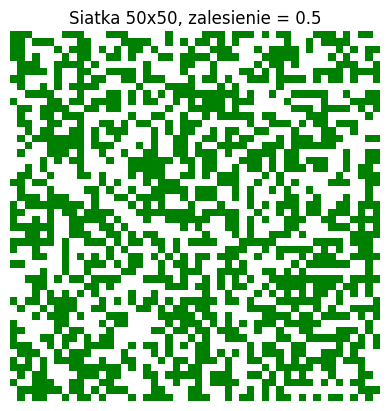

In [2042]:
grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

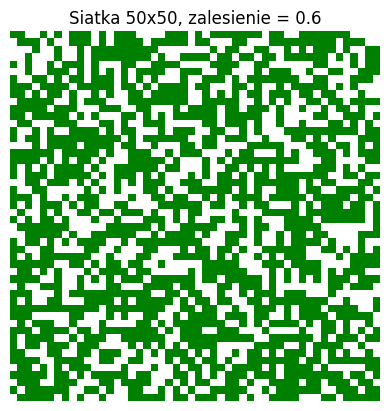

In [2043]:
size = 50  
p_tree = 0.6  

grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

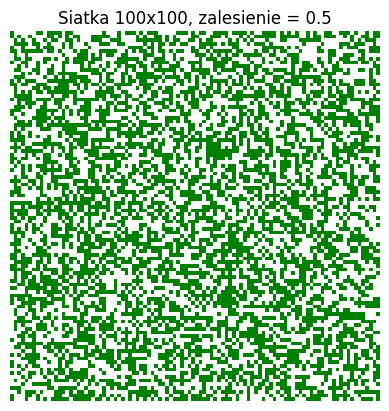

In [2044]:
size = 100  
p_tree = 0.5 

grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

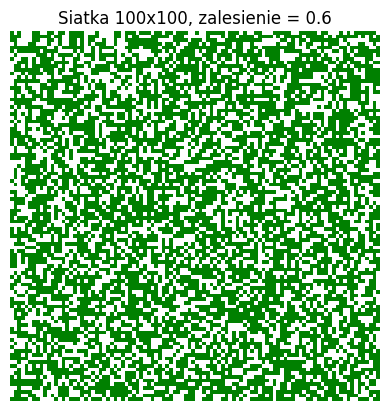

In [2045]:
size = 100 
p_tree = 0.6 

grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

#### 4. Sąsiedztwo (Von Neumanna i Moore'a)

In [2046]:
def get_neighbors(x, y, size, neighborhood):
    if neighborhood == "von_neumann":
        neighbors = np.array([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])
    elif neighborhood == "moore":
        neighbors = np.array([(x-1, y-1), (x-1, y), (x-1, y+1),  
                            (x, y-1), (x, y+1),             
                            (x+1, y-1), (x+1, y), (x+1, y+1)])
    else:
        return [] 
    neighbors = [(nx, ny) for nx, ny in neighbors if 0 <= nx < size and 0 <= ny < size] 
    return neighbors

#### 5. Pożar i jego rozprzestrzenianie się

In [2047]:
def start_fire(forest_before_fire):
    forest = forest_before_fire.copy()
    forest[0, :] = np.where(forest[0, :] == tree_cond["TREE"], tree_cond["BURNING"], forest[0, :])
    return forest

In [2048]:
def spread_fire(forest_with_fire, size, p_fire, neighborhood):
    new_forest = forest_with_fire.copy()
    size = forest_with_fire.shape[0]

    for x in range(size):
        for y in range(size):
            if forest_with_fire[x, y] == tree_cond["BURNING"]:
                new_forest[x, y] = tree_cond["BURNED"]
                
                for nx, ny in get_neighbors(x, y, size, neighborhood):
                    if forest_with_fire[nx, ny] == tree_cond["TREE"]:
                        if np.random.rand() < p_fire:
                            new_forest[nx, ny] = tree_cond["BURNING"]
    return new_forest

#### 6. Symulacja rozprzestrzeniania się ognia

In [2049]:
def fire_simulation(size, p_fire, p_tree, neighborhood, gif_name, M_frames=100):
    forest = forest_grid(size, p_tree)
    frames = []

    for step in range(M_frames):
        if step == 1:
            forest = start_fire(forest)
        elif step > 1:
            forest = spread_fire(forest, forest, p_fire, neighborhood)

        fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
        ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
        ax.axis('off')
        ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}, sąsiedztwo = {neighborhood}')
        plt.draw()
        fig.canvas.draw()

        buf = fig.canvas.buffer_rgba()
        image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
        frames.append(image)
        plt.close(fig)

    frames[0].save(f'{gif_name}.gif', save_all=True, append_images=frames[1:], loop=0, duration=200)
    print(f"Animacja została zapisana jako '{gif_name}.gif'")

In [2050]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.5, neighborhood="von_neumann", gif_name = f"Neumann_50x50_05", M_frames=50)

In [2051]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.6, neighborhood="von_neumann", gif_name = f"Neumann_50x50_06", M_frames=150)

In [2052]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.5, neighborhood="moore", gif_name = f"Moore_50x50_05", M_frames=100)

#### 7. Szybkość rozprzestrzeniania się pożaru.

In [2053]:
def how_much_burned(size, p_fire, p_tree, neighborhood, M=100):
    burned = np.zeros(M)
    forest = forest_grid(size, p_tree)
    total_trees = np.sum(forest == tree_cond["TREE"])
    forest = start_fire(forest)
    
    for step in range(M):
        burned_trees = np.sum(forest == tree_cond["BURNED"]) + np.sum(forest == tree_cond["BURNING"])
        burned[step] = (burned_trees / total_trees) * 100 if total_trees > 0 else 0
        forest = spread_fire(forest, size, p_fire, neighborhood)

    return burned, np.arange(M)

##### 7.1. Rozprzestrzenianie się pożaru VS n-ty krok symulacji

- Przypadek jednej symulacji / jednego wyniku

In [2054]:
M = 200
p_fire, p_tree = 1, 0.6
size = 50

In [2055]:
# burned_neumann_v1, steps = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
# burned_moore_v1, _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

In [2056]:
# plt.figure(figsize=(6, 4))
# plt.plot(steps, burned_moore_v1, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(steps, burned_neumann_v1, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Krok symulacji')
# plt.ylabel('Rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {0.6}\np_fire = {1.0}\ngrid_size = {size}x{size}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("burned_vs_steps.png", dpi=300)
# plt.show()

- Średnia z 100 symulacji

In [2057]:
N = 100
M = 200
p_fire, p_tree = 1, 0.6
size = 50

In [2058]:
# burned_neumann_v2 = np.zeros((N, M))
# burned_moore_v2 = np.zeros((N, M))
# steps = np.arange(M)

# for i in range(N):
#     burned_neumann_v2[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#     burned_moore_v2[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

# avg_burned_neumann = np.mean(burned_neumann_v2, axis=0)
# avg_burned_moore = np.mean(burned_moore_v2, axis=0)

In [2059]:
# plt.figure(figsize=(6, 4))
# plt.plot(steps, avg_burned_moore, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(steps, avg_burned_neumann, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Krok symulacji')
# plt.ylabel('Średni rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {0.6}\np_fire = {1.0}\ngrid_size = {size}x{size}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("avg100_burned_vs_steps.png", dpi=300)
# plt.show()

##### 7.2. Rozprzestrzenianie się pożaru VS wartość zalesienia (p_tree)

- Przypadek jednej symulacji / jednego wyniku

In [2060]:
M = 200
p_fire = 1
p_tree_values = np.arange(0.1, 1.1, 0.1)
size = 50

In [2061]:
# burned_neumann_v3 = np.zeros((len(p_tree_values), M))
# burned_moore_v3 = np.zeros((len(p_tree_values), M))
# steps = np.arange(M)

# for i, p_tree in enumerate(p_tree_values):
#     burned_neumann_v3[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#     burned_moore_v3[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

In [2062]:
# plt.figure(figsize=(6, 4))
# plt.plot(p_tree_values, burned_moore_v3[:,-1], label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(p_tree_values, burned_neumann_v3[:,-1], label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Prawdopodobieństwo zalesienia (p_tree)')
# plt.ylabel('Rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {p_tree}\np_fire = {p_fire}\ngrid_size = {size}x{size}\nsim_steps = {M}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("burned_vs_tree.png", dpi=300)
# plt.show()

- Średnia z 100 symulacji

In [2063]:
N = 100
M = 200
p_fire = 1
p_tree_values = np.arange(0.1, 1.1, 0.1)
size = 50

In [2064]:
# burned_neumann_v4 = np.zeros((len(p_tree_values), N))
# burned_moore_v4 = np.zeros((len(p_tree_values), N))

# for j in range(N):
#     for i, p_tree in enumerate(p_tree_values):
#         burned_neumann, _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#         burned_moore, _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

#         burned_neumann_v4[i, j] = burned_neumann[-1]
#         burned_moore_v4[i, j] = burned_moore[-1]

# avg_burned_neumann_v2 = np.mean(burned_neumann_v4, axis=1)
# avg_burned_moore_v2 = np.mean(burned_moore_v4, axis=1)

In [2065]:
# plt.figure(figsize=(6, 4))
# plt.plot(p_tree_values, avg_burned_moore_v2, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(p_tree_values, avg_burned_neumann_v2, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Prawdopodobieństwo zalesienia (p_tree)')
# plt.ylabel('Średni rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {p_tree}\np_fire = {p_fire}\ngrid_size = {size}x{size}\nsim_steps = {M}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("avg100_burned_vs_tree.png", dpi=300)
# plt.show()

##### 7.2. Rozprzestrzenianie się pożaru VS rozmiar siatki (size)

- Przypadek jednej symulacji / jednego wyniku

In [2066]:
M = 200
p_fire, p_tree = 1, 0.6
size_values = np.arange(50, 300, 50)

In [2067]:
# burned_neumann_v5 = np.zeros((len(size_values), M))
# burned_moore_v5 = np.zeros((len(size_values), M))

# for i, size in enumerate(size_values):
#     burned_neumann_v5[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#     burned_moore_v5[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

In [2068]:
# plt.figure(figsize=(6, 4))
# plt.plot(size_values, burned_moore_v5[:,-1], label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(size_values, burned_neumann_v5[:,-1], label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Rozmiar siatki (size)')
# plt.ylabel('Rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {0.6}\np_fire = {p_fire}\nsim_steps = {M}"
# plt.text(0.23, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower left")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("burned_vs_size.png", dpi=300)
# plt.show()

- Średnia z 100 symulacji

In [2069]:
M = 200
N = 100
p_fire, p_tree = 1, 0.6
size_values = np.arange(50, 300, 50)

In [2070]:
# burned_neumann_v6 = np.zeros((len(size_values), N))
# burned_moore_v6 = np.zeros((len(size_values), N))

# for j in range(N):
#     for i, size in enumerate(size_values):
#         burned_neumann, _ = how_much_burned(size=size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#         burned_moore, _ = how_much_burned(size=size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

#         burned_neumann_v6[i, j] = burned_neumann[-1]
#         burned_moore_v6[i, j] = burned_moore[-1]

# avg_burned_neumann_v3 = np.mean(burned_neumann_v6, axis=1)
# avg_burned_moore_v3 = np.mean(burned_moore_v6, axis=1)

In [2071]:
# plt.figure(figsize=(6, 4))
# plt.plot(size_values, avg_burned_moore_v3, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(size_values, avg_burned_neumann_v3, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Rozmiar siatki (size)')
# plt.ylabel('Średni rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {p_tree}\np_fire = {p_fire}\nsim_steps = {M}"
# plt.text(0.23, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower left")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("avg100_burned_vs_size.png", dpi=300)
# plt.show()

$
\huge \textbf{Prezentacja 4}
$

#### 5. Las nie jest jednolity - mogą występować różne rodzaje drzew co wpływa na łatwość ich zapalenia (p_fire). Na ten moment rozważamy najprosztszą sytuację:
- 1 - drzewo łatwopalne (kolor jasnozielony)
- 2 - drzewo trudnopalne (kolor ciemnozielony)

In [2072]:
tree_type = {"EMPTY": 0, "Łatwopalne": 1, "Trudnopalne": 2}
tree_type_color = {"EMPTY": "white", "Łatwopalne": "yellowgreen", "Trudnopalne": "green"}
p_fire_mixed = {"Łatwopalne": 1, "Trudnopalne": 0}

In [2073]:
def mixed_forest_grid(size: int, p_tree: float, tree_types: List[int] = None, tree_ratio: List[float] = [0.3, 0.7]) -> Tuple[np.ndarray, np.ndarray]:
    if tree_types is None:
        tree_types = list(tree_type.values())

    tree_ratio = np.array(tree_ratio) * p_tree

    mixed_forest = np.random.choice(tree_types, size=(size,size), p=[1 - p_tree, *tree_ratio])
    forest = np.where(np.isin(mixed_forest, tree_types), tree_cond["TREE"], tree_cond["EMPTY"])

    return forest, mixed_forest

##### 5.1. Siatka lasu z różnymi typami drzew

In [2074]:
def draw_mixed_forest(size, tree_ratio, colors, tree_types=None, legend_labels=None, p_tree=0.6):
    if legend_labels is None:
        legend_labels=list(tree_type.keys())[1:]

    _, mixed_grid = mixed_forest_grid(size=size, p_tree=p_tree, tree_types=tree_types, tree_ratio=tree_ratio)
    cmap = ListedColormap(colors.values())
    vmin, vmax = 0, len(list(colors.keys()))-1

    plt.figure(figsize=(6,4))
    ax = plt.gca()
    ax.imshow(mixed_grid, cmap=cmap, vmin=vmin, vmax=vmax)

    for spine in ax.spines.values():
        spine.set_linewidth(1)
        spine.set_color('black')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.title(f'zalesienie = {p_tree}, tree_ratio = {tree_ratio}')

    legend_elements = [mpatches.Patch(color=colors[label], label=label) for label in legend_labels]
    plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.6, 1.0), title="Rodzaje drzew: ")
    
    plt.show()

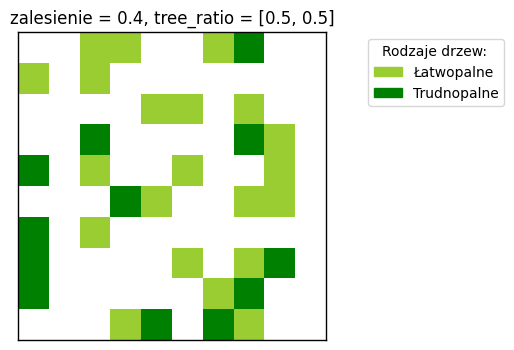

In [2075]:
size = 10
p_tree = 0.4
ratio=[0.5, 0.5]
draw_mixed_forest(size=size, tree_ratio=ratio, colors=tree_type_color, p_tree=p_tree)

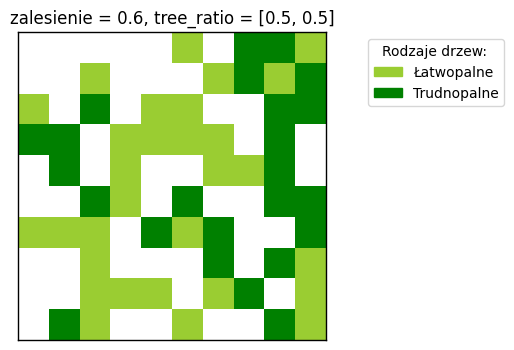

In [2076]:
size = 10
p_tree = 0.6
ratio=[0.5, 0.5]

draw_mixed_forest(size=size, tree_ratio=ratio, colors=tree_type_color, p_tree=p_tree)

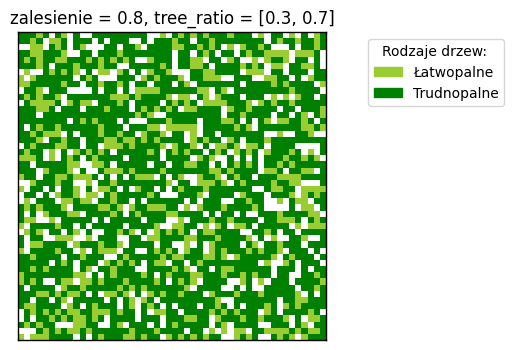

In [2077]:
size = 50
p_tree = 0.8
ratio =[0.3, 0.7]

draw_mixed_forest(size=size, tree_ratio=ratio, colors=tree_type_color, p_tree=p_tree)

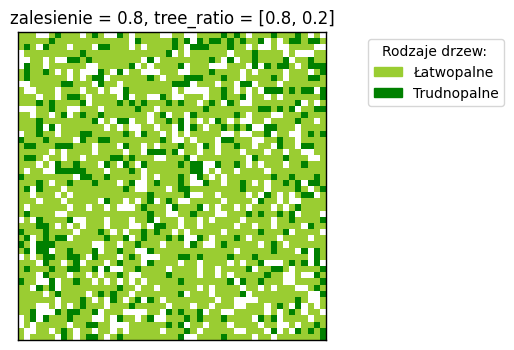

In [2078]:
size = 50
p_tree = 0.8
ratio = [0.8,0.2]

draw_mixed_forest(size=size, tree_ratio=ratio, colors=tree_type_color, p_tree=p_tree)

##### 5.2. Rozprzestrzenianie się pożaru w lesie z różnymi typami drzew

In [2079]:
def spread_fire_v2(forest_with_fire, mixed_forest, p_fire_mixed, neighborhood):
    new_forest = forest_with_fire.copy()
    size = forest_with_fire.shape[0]

    id_to_name = {v: k for k, v in tree_type.items()}

    for x in range(size):
        for y in range(size):
            if forest_with_fire[x, y] == tree_cond["BURNING"]:
                new_forest[x, y] = tree_cond["BURNED"]
                
                for nx, ny in get_neighbors(x, y, size, neighborhood):
                    if forest_with_fire[nx, ny] == tree_cond["TREE"]:
                        t_type = mixed_forest[nx, ny]
                        tree_name = id_to_name.get(t_type, 0)
                        p_fire = p_fire_mixed.get(tree_name, 0)
                        if np.random.rand() < p_fire:
                            new_forest[nx, ny] = tree_cond["BURNING"]
    return new_forest

In [2080]:
def get_colored_forest(forest, mixed_forest):
    size = forest.shape[0]
    rgb_array = np.zeros((size, size, 3), dtype=np.uint8)

    inverse_tree_type = {v: k for k, v in tree_type.items()}

    for x in range(size):
        for y in range(size):
            cell = forest[x, y]

            if cell == tree_cond["TREE"]:
                t_type_value = mixed_forest[x, y]
                t_type_name = inverse_tree_type.get(t_type_value, "EMPTY")
                color_name = tree_type_color.get(t_type_name, "green")
            else:
                t_cond_name = [k for k, v in tree_cond.items() if v == cell][0]
                color_name = tree_color.get(t_cond_name, "white")

            rgb = np.array(mcolors.to_rgb(color_name)) * 255
            rgb_array[x, y] = rgb.astype(np.uint8)

    return rgb_array

In [2081]:
def fire_simulation_mixed(size, p_tree, tree_ratio, p_fire_mixed, neighborhood, gif_name, M_frames=100):
    forest, mixed_forest = mixed_forest_grid(size, p_tree, tree_ratio=tree_ratio)
    frames = []

    legend_elements = [mpatches.Patch(color=tree_type_color[label], label=label)
                       for label in tree_type][1:]

    for step in range(M_frames):
        if step == 1:
            forest = start_fire(forest)
        elif step > 1:
            forest = spread_fire_v2(forest, mixed_forest, p_fire_mixed, neighborhood)

        fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
        colored_forest = get_colored_forest(forest, mixed_forest)
        ax.imshow(colored_forest)
        ax.axis('off')
        ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}, sąsiedztwo = {neighborhood}')
        ax.legend(handles=legend_elements, loc="lower left", title_fontsize=14, fontsize=12, borderpad=1.0,
                  bbox_to_anchor=(-0.1, -0.1), title="Rodzaje drzew")
        plt.draw()
        fig.canvas.draw()

        buf = fig.canvas.buffer_rgba()
        image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
        frames.append(image)
        plt.close(fig)

    frames[0].save(f'{gif_name}.gif', save_all=True, append_images=frames[1:], loop=0, duration=200)
    print(f"Animacja została zapisana jako '{gif_name}.gif'")

In [2082]:
p_fire_mixed = {"Łatwopalne": 1.0, "Trudnopalne": 0}

fire_simulation_mixed(50,0.6,[0.5,0.5], p_fire_mixed, 'moore', 'moore_fire1x0')

fire_simulation_mixed(50,0.6,[0.5,0.5], p_fire_mixed, 'von_neumann', 'neumann_fire1x0')

Animacja została zapisana jako 'moore_fire1x0.gif'
Animacja została zapisana jako 'neumann_fire1x0.gif'


In [2083]:
p_fire_type = {"Łatwopalne": 0.8, "Trudnopalne": 0.4}

fire_simulation_mixed(50,0.6,[0.5,0.5], p_fire_mixed, 'moore', 'moore_fire0.8x0.4')

fire_simulation_mixed(50,0.6,[0.5,0.5], p_fire_mixed, 'von_neumann', 'neumann_fire0.8x0.4')

Animacja została zapisana jako 'moore_fire0.8x0.4.gif'
Animacja została zapisana jako 'neumann_fire0.8x0.4.gif'


##### 5.3. Rozmiar spalonego obszaru (wyodrębnienie typów drzew)

In [2084]:
def how_much_burned_mixed(size, p_fire_mixed, tree_ratio, p_tree, neighborhood, tree_types=None, M=100):
    burned_all = np.zeros(M)
    burned_easy = np.zeros(M)
    burned_hard = np.zeros(M)

    forest, mixed_forest = mixed_forest_grid(size=size, p_tree=p_tree, tree_types=tree_types, tree_ratio=tree_ratio)
    total_trees = np.sum(forest == tree_cond["TREE"])
    forest = start_fire(forest)
    
    for step in range(M):
        burning_mask = (forest == tree_cond["BURNED"]) | (forest == tree_cond["BURNING"])
        burned_trees = np.sum(burning_mask)
        
        burned_easy_count = np.sum(burning_mask & (mixed_forest == tree_type["Łatwopalne"]))
        burned_hard_count = np.sum(burning_mask & (mixed_forest == tree_type["Trudnopalne"]))
        
        burned_all[step] = (burned_trees / total_trees) * 100 if total_trees > 0 else 0
        burned_easy[step] = (burned_easy_count / total_trees) * 100 if total_trees > 0 else 0
        burned_hard[step] = (burned_hard_count / total_trees) * 100 if total_trees > 0 else 0
        
        forest = spread_fire_v2(forest, mixed_forest, p_fire_mixed, neighborhood)
    
    return burned_all, burned_easy, burned_hard

In [2085]:
def bar_plots(size, M, p_fire_mixed, tree_ratio, p_tree, neighborhood, save_name="burned_bars", save=False,
              tree_types=None, step=20, width=2, xs=2, legend_loc="lower right"):
    M_range = np.arange(M)
    
    burned_all, burned_easy, burned_hard = how_much_burned_mixed(
        size=size, 
        p_fire_mixed=p_fire_mixed, 
        tree_ratio=tree_ratio, 
        p_tree=p_tree, 
        neighborhood=neighborhood, 
        tree_types=tree_types, 
        M=M
    )

    M_range_thinned = M_range[::step]
    burned_all_thinned = burned_all[::step]
    burned_easy_thinned = burned_easy[::step]
    burned_hard_thinned = burned_hard[::step]

    plt.figure(figsize=(6, 4))

    plt.bar(M_range_thinned - xs, burned_all_thinned, width=width, label='Wszystkie spalone drzewa')
    plt.bar(M_range_thinned, burned_easy_thinned, width=width, label=f'Łatwopalne drzewa (p_fire = {p_fire_mixed.get("Łatwopalne", "?")})')
    plt.bar(M_range_thinned + xs, burned_hard_thinned, width=width, label=f'Trudnopalne drzewa (p_fire = {p_fire_mixed.get("Trudnopalne", "?")})')

    plt.xlabel('Krok czasowy')
    plt.ylabel('Procent spalonych drzew (%)')

    param_text = f"p_tree = {p_tree}\ntree_ratio = {tree_ratio}\ngrid_size = {size}x{size}"
    plt.text(0.03, 0.82, param_text,
             transform=plt.gca().transAxes,
             fontsize=9,
             verticalalignment='bottom',
             horizontalalignment='left',
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.85))

    plt.legend(loc=legend_loc)
    plt.title(f'Wykres dla sąsiedztwa {neighborhood.capitalize()}')
    plt.grid(True, linestyle='--')
    plt.tight_layout()

    if save:
        plt.savefig(f"{save_name}.png", dpi=300)
    plt.show()

a) 
- tree_ratio = [0.5, 0.5]: 

-> Łatwopalne: p_fire = 1; 

-> Trudnopalne: p_fire = 0.3

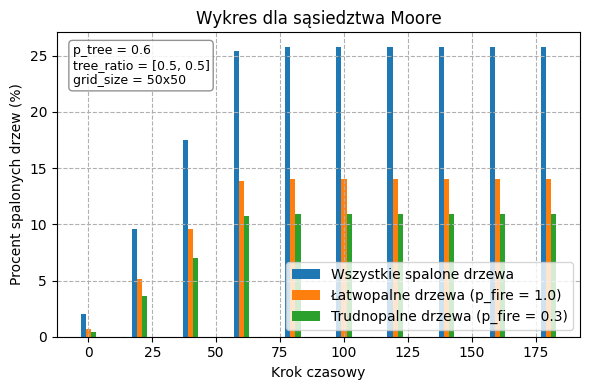

In [2086]:
bar_plots(
    size=50,
    M=200,
    p_fire_mixed={"Łatwopalne": 1.0, "Trudnopalne": 0.3},
    tree_ratio=[0.5, 0.5],
    p_tree=0.6,
    neighborhood='moore',
    save=True,
    save_name="burned_bars_v1"
)


b) 
- tree_ratio = [0.5, 0.5]: 

-> Łatwopalne: p_fire = 0.8; 

-> Trudnopalne: p_fire = 0.4

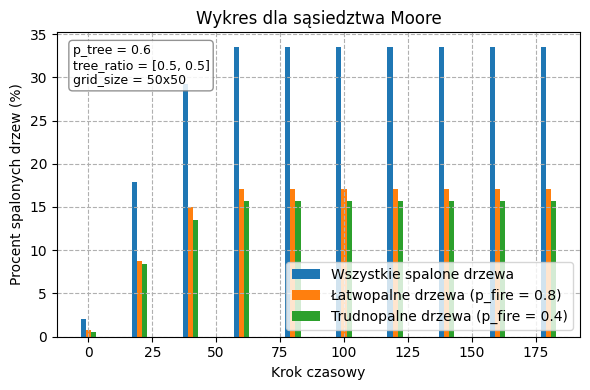

In [2087]:
bar_plots(
    size=50,
    M=200,
    p_fire_mixed={"Łatwopalne": 0.8, "Trudnopalne": 0.4},
    tree_ratio=[0.5, 0.5],
    p_tree=0.6,
    neighborhood='moore',
    save=True,
    save_name="burned_bars_v2"
)


c) 
- tree_ratio = [0.8, 0.2]: 

-> Łatwopalne: p_fire = 0.8; 

-> Trudnopalne: p_fire = 0.4

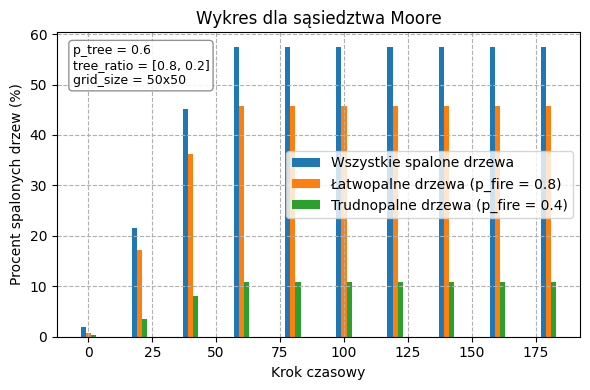

In [2088]:
bar_plots(
    size=50,
    M=200,
    p_fire_mixed={"Łatwopalne": 0.8, "Trudnopalne": 0.4},
    tree_ratio=[0.8, 0.2],
    p_tree=0.6,
    neighborhood='moore',
    save_name="burned_bars_v3",
    save = True,
    legend_loc="center right"
)


d) 
- tree_ratio = [0.2, 0.8]: 

-> Łatwopalne: p_fire = 0.8; 

-> Trudnopalne: p_fire = 0.4

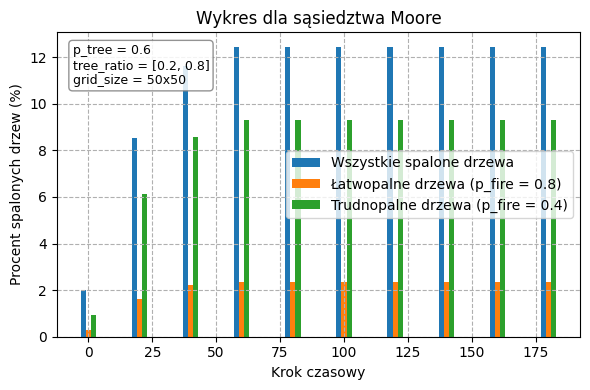

In [2089]:
bar_plots(
    size=50,
    M=200,
    p_fire_mixed={"Łatwopalne": 0.8, "Trudnopalne": 0.4},
    tree_ratio=[0.2, 0.8],
    p_tree=0.6,
    neighborhood='moore',
    save_name="burned_bars_v4",
    save=True,
    legend_loc="center right"
)
